In [37]:

import csv
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline

In [38]:
pd.set_option('display.max_columns', 500)

In [39]:
df = pd.read_csv('Capstone updated 1219.csv', parse_dates = ['latest_transaction','latest_membership_expiration','latest_listen_date','registration_init_time'])
df

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,latest_transaction,latest_membership_expiration,is_cancel,avg_membership_duration,avg_time_between_transactions,latest_listen_date,num_unq,total_secs,percent_25,percent_50,percent_100,city,registered_via,registration_init_time
0,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-19,0.0,49.5,15.5,2017-03-31,43.0,115411.260,0.075838,0.021164,0.876543,15.0,9.0,2010-11-18
1,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-23,0.0,53.5,15.5,2017-03-30,52.0,36636.638,0.317597,0.077253,0.562232,22.0,9.0,2012-01-22
2,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,0,14.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-04,0.0,34.5,15.5,2017-03-25,25.0,10243.065,0.090909,0.072727,0.763636,13.0,3.0,2014-04-21
3,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-21,0.0,51.5,15.5,2017-03-28,80.0,292650.977,0.157303,0.024345,0.808989,13.0,9.0,2006-02-18
4,++6P09mCSJSh+Ft2pvZ0FWTrtcI3v1A7h3/coh8dBKw=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-13,0.0,43.5,15.5,2017-03-25,7.0,2994.947,0.000000,0.142857,0.857143,22.0,9.0,2010-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725717,zzx1qgX8R9EmT8PAn4/KyQ6s7PuLYTfR8kUCABiCW9E=,0,41.0,30.0,99.0,99.0,1.0,2017-03-31,2017-04-30,0.0,30.0,0.0,2017-03-24,38.0,27727.142,0.057554,0.007194,0.913669,6.0,9.0,2014-10-14
725718,zzx4hKiyR9XFEGAr7SAjcCPbKJCZ+IqegWL7dPjPwZk=,0,41.0,30.0,99.0,99.0,1.0,2017-03-18,2017-04-19,0.0,32.0,0.0,2017-03-26,45.0,51394.898,0.095238,0.035714,0.861111,1.0,7.0,2011-08-23
725719,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0,41.0,30.0,99.0,99.0,1.0,2017-03-26,2017-04-26,0.0,31.0,0.0,2017-03-10,40.0,13172.171,0.033333,0.000000,0.966667,4.0,7.0,2012-03-06
725720,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,36.0,30.0,180.0,180.0,0.0,2017-02-28,2017-04-01,0.0,32.0,0.0,2017-03-31,56.0,268039.763,0.094642,0.048017,0.825331,5.0,3.0,2015-04-30


46603 0.06421604967191294


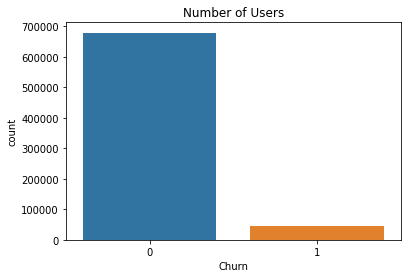

In [102]:
totusers = len(df['msno'])
not_churn = df[df['is_churn'] == 0]
is_churn = df[df['is_churn'] == 1]
sns.countplot(x = 'is_churn', data = df)
plt.title('Number of Users')
plt.xlabel('Churn')
print(len(is_churn), len(is_churn) / totusers)

# Total of 6% of users appeared to have churned in March.

C:\Users\marsh\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


<AxesSubplot: xlabel='amdqcut', ylabel='count'>

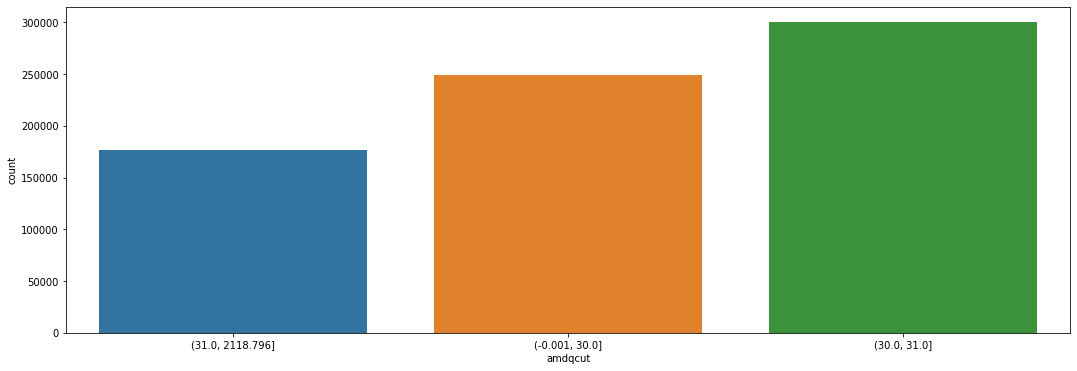

In [41]:
df['amdqcut'] = pd.qcut(df["avg_membership_duration"], q = 4,duplicates = 'drop')
df['amdqcut'] = df.amdqcut.astype(str)
plt.figure(figsize=(18,6))
sns.countplot(x = 'amdqcut', data = df)


C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/1058234847.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  amd = df.groupby('amdqcut').sum()['is_churn'] /totusers *100


([0, 1, 2],
 [Text(0, 0, '(-0.001, 30.0]'),
  Text(1, 0, '(30.0, 31.0]'),
  Text(2, 0, '(31.0, 2118.796]')])

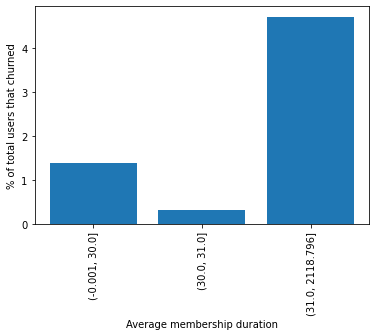

In [42]:
amd = df.groupby('amdqcut').sum()['is_churn'] /totusers *100
plt.bar(amd.index, amd.values)
plt.xlabel('Average membership duration')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')


In [43]:
df.sort_values('avg_time_between_transactions')

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,latest_transaction,latest_membership_expiration,is_cancel,avg_membership_duration,avg_time_between_transactions,latest_listen_date,num_unq,total_secs,percent_25,percent_50,percent_100,city,registered_via,registration_init_time,amdqcut
362860,OmfhRuY86uJfwHMzLWRr/naOKQx4fzWDsTOs4WHcrYI=,0,29.0,30.0,180.0,180.0,1.0,2017-03-06,2017-04-06,0.0,31.0,0.0,2017-03-29,7.0,1001.759,0.545455,0.090909,0.272727,1.0,3.0,2013-06-29,"(30.0, 31.0]"
483809,b7V9XfHDWYUotgcQRe1tqWFogthuUfkh8nzrl1yO6+w=,0,41.0,30.0,99.0,99.0,1.0,2017-03-08,2017-04-08,0.0,31.0,0.0,2017-03-31,20.0,33173.913,0.134503,0.052632,0.754386,1.0,7.0,2016-12-09,"(30.0, 31.0]"
483810,b7VF0wJW+FMdMOcwM8Cg8On8Vh+sOnq5QF2rpOPtBl4=,0,36.0,30.0,180.0,180.0,0.0,2017-03-15,2017-04-14,0.0,30.0,0.0,2017-03-25,52.0,60902.544,0.281346,0.012232,0.700306,1.0,4.0,2017-02-03,"(-0.001, 30.0]"
483811,b7Vpr5Ms67EQbBdKaSGSxXokhm+Qi3lI03za+mNq/Ek=,0,40.0,30.0,149.0,149.0,1.0,2017-03-01,2017-04-06,0.0,36.0,0.0,2017-03-31,129.0,139609.893,0.402692,0.025880,0.557971,14.0,3.0,2015-01-29,"(31.0, 2118.796]"
483812,b7W+N/zKyn1TL0jABljCF7gdZtkZqquLOmCoUtmbX7Q=,0,41.0,30.0,99.0,99.0,1.0,2017-03-20,2017-04-20,0.0,31.0,0.0,2017-03-31,157.0,307407.921,0.192800,0.049420,0.721171,1.0,7.0,2016-10-21,"(30.0, 31.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52997,VFBK5F9MaKxxPo+ETyB2HZ2WuWdcW1ZYD3IJa8Vra94=,0,41.0,30.0,149.0,149.0,1.0,2017-03-31,2017-04-30,0.0,259.0,243.5,2017-03-29,58.0,66353.440,0.105769,0.009615,0.878205,1.0,7.0,2013-12-29,"(31.0, 2118.796]"
9017,3hzfAZktGsEstPATejbfrE1fKK92vtFkxEgHO901X1I=,0,41.0,30.0,149.0,149.0,1.0,2017-03-27,2017-04-27,0.0,274.0,244.0,2017-03-10,19.0,10227.167,0.264151,0.056604,0.660377,1.0,7.0,2011-02-08,"(31.0, 2118.796]"
7225,2aSo2bMw6yoagfbExxpZi0o7eO1E5GLbOsHpq78vjzI=,1,32.0,410.0,1788.0,1788.0,0.0,2017-03-21,2018-05-05,0.0,607.5,250.0,2017-03-31,23.0,27921.461,0.068702,0.038168,0.893130,13.0,3.0,2013-05-03,"(31.0, 2118.796]"
96268,wGGkFsdPsa9OSVf3cVGxlfg/YWQowo1/UGw+iTRQjfM=,0,32.0,410.0,1788.0,1788.0,0.0,2017-03-16,2018-01-27,0.0,428.0,254.5,2017-03-31,62.0,333966.388,0.075347,0.022905,0.883665,9.0,3.0,2013-03-23,"(31.0, 2118.796]"


C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/1641714361.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  atbt = df.groupby('avg_time_between_transactions').sum()['is_churn'] /totusers *100


(0.0, 30.0)

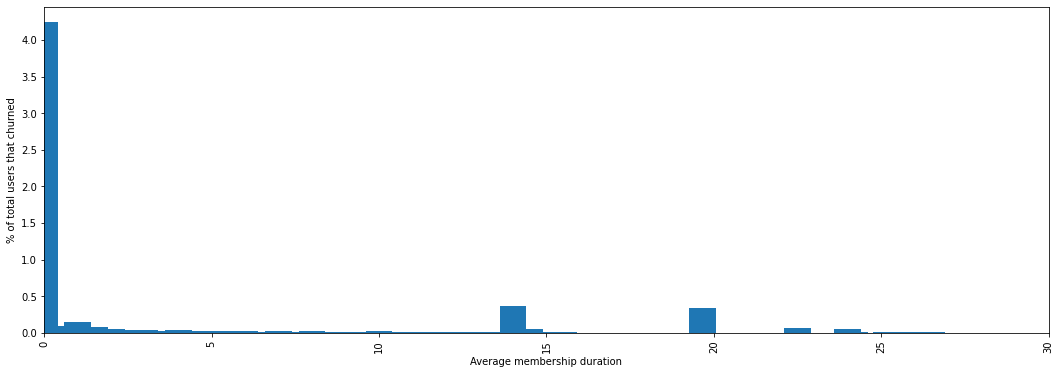

In [44]:
df.avg_time_between_transactions = round(df.avg_time_between_transactions,2)

atbt = df.groupby('avg_time_between_transactions').sum()['is_churn'] /totusers *100
plt.figure(figsize=(18,6))
plt.bar(atbt.index, atbt.values)
plt.xlabel('Average membership duration')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.xlim([0,30])

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/2853661683.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  listen = df.groupby('latest_listen_date').sum()['is_churn'] / totusers *100


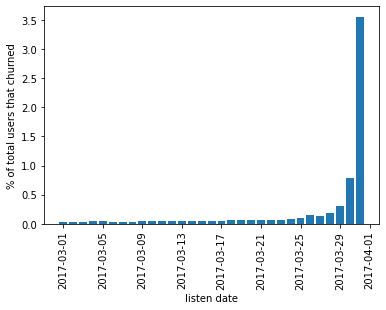

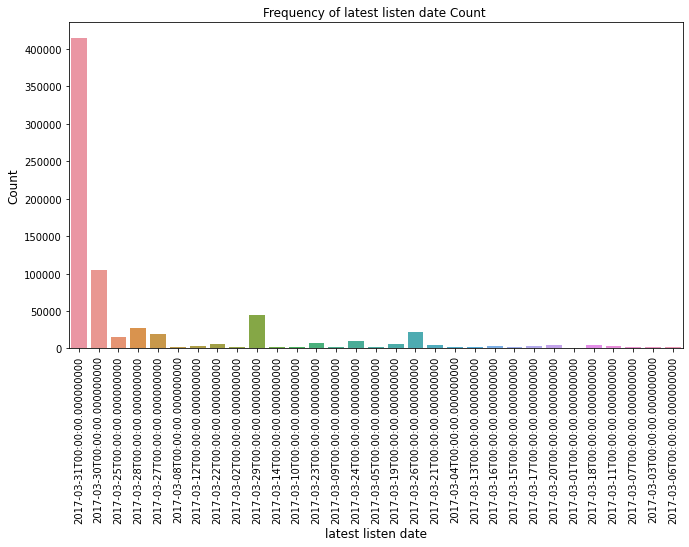

In [45]:
listen = df.groupby('latest_listen_date').sum()['is_churn'] / totusers *100

plt.bar(listen.index, listen.values)
plt.xlabel('listen date')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')


plt.figure(figsize=(11,6))
sns.countplot(x="latest_listen_date", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('latest listen date', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of latest listen date Count ", fontsize=12)
plt.show()

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/712132264.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unq = df.groupby('num_unq').sum()['is_churn']


(0.0, 250.0)

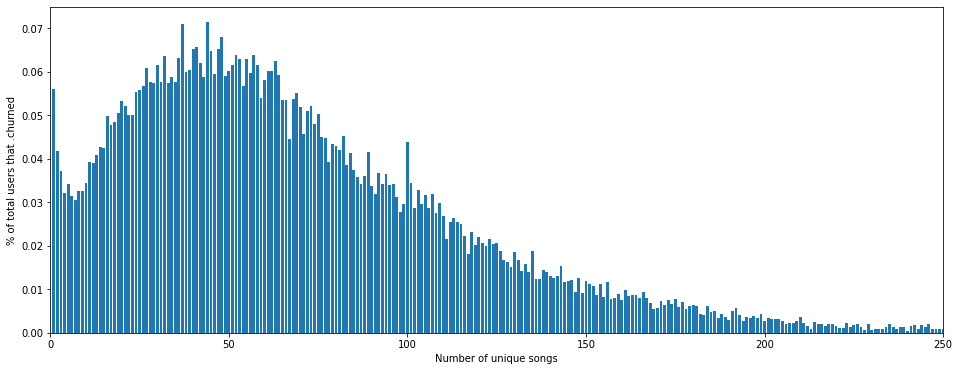

In [46]:
unq = df.groupby('num_unq').sum()['is_churn']
unq = unq / totusers * 100
plt.figure(figsize = (16,6))
plt.bar(list(unq.index), list(unq))
plt.xlabel('Number of unique songs')
plt.ylabel('% of total users that .churned')
plt.xlim([0,250])

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/698581994.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  autorenew = df.groupby('is_auto_renew').sum()['is_churn']


([<matplotlib.axis.XTick at 0x27c83573190>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

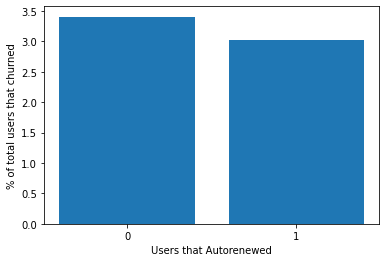

In [47]:
autorenew = df.groupby('is_auto_renew').sum()['is_churn']
autorenew = autorenew / totusers *100
plt.bar(list(autorenew.index), list(autorenew))
plt.xlabel('Users that Autorenewed')
plt.ylabel('% of total users that churned')
plt.xticks(ticks = [0,1])

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/2496259477.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cancel = df.groupby('is_cancel').sum()['is_churn']


([<matplotlib.axis.XTick at 0x27c97869490>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

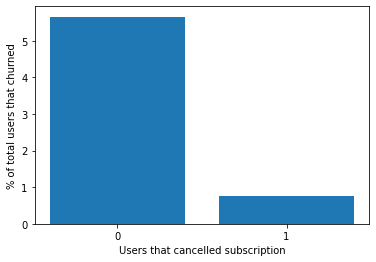

In [48]:
cancel = df.groupby('is_cancel').sum()['is_churn']
cancel = cancel / totusers * 100
plt.bar(list(cancel.index), list(cancel))
plt.xlabel('Users that cancelled subscription')
plt.ylabel('% of total users that churned')
plt.xticks(ticks = [0,1])

# Unusal that users that cancel were less likely to churn. Likely due to the fact that cancellations are due to a change
# in subscription plan.

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/3408137175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg = df.groupby('registered_via').sum()['is_churn'] / totusers *100


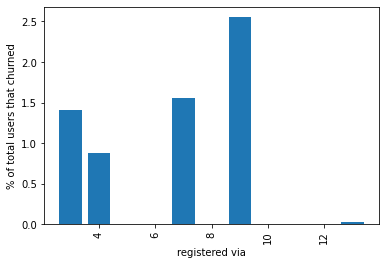

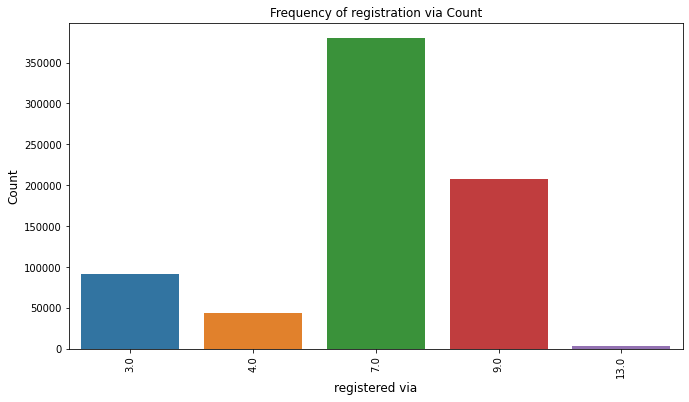

In [49]:
reg = df.groupby('registered_via').sum()['is_churn'] / totusers *100

plt.bar(reg.index, reg.values)
plt.xlabel('registered via')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()

plt.figure(figsize=(11,6))
sns.countplot(x="registered_via", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('registered via', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of registration via Count", fontsize=12)
plt.show()

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/1388577856.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  expire = df.groupby('latest_membership_expiration').sum()['is_churn'] / totusers *100


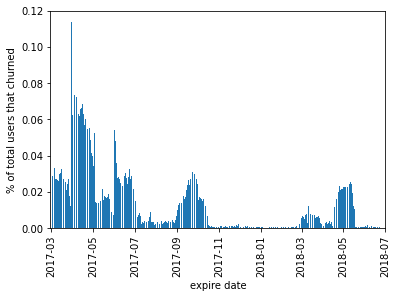

In [78]:
expire = df.groupby('latest_membership_expiration').sum()['is_churn'] / totusers *100
plt.bar(expire.index, expire.values)
plt.xlabel('expire date')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.xlim([datetime.date(2017, 2, 28), datetime.date(2018, 7,1)])
plt.ylim([0,0.12])
plt.show()

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/2677822655.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transaction = df.groupby('latest_transaction').sum()['is_churn'] / totusers *100


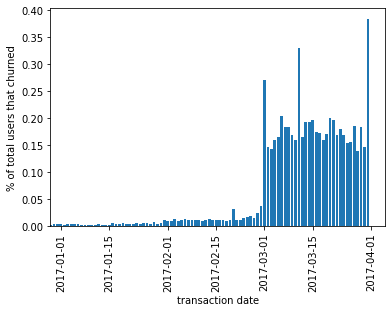

In [51]:
transaction = df.groupby('latest_transaction').sum()['is_churn'] / totusers *100

plt.bar(transaction.index, transaction.values)
plt.xlabel('transaction date')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.xlim([datetime.date(2016, 12, 29), datetime.date(2017, 4,5)])
plt.show()

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/182627345.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  regtime = df.groupby('year').sum()['is_churn'] / totusers *100


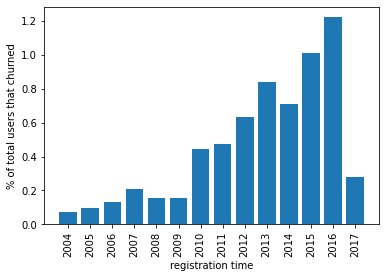

<AxesSubplot: xlabel='year', ylabel='count'>

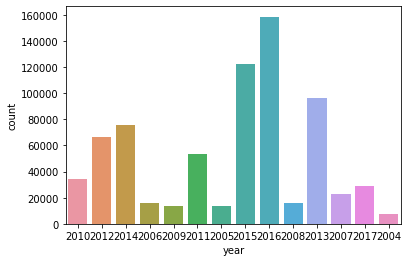

In [52]:
df['year'] = pd.to_datetime(df['registration_init_time']).dt.to_period('Y')
df['year'] = df.year.astype(str)
regtime = df.groupby('year').sum()['is_churn'] / totusers *100
plt.bar(regtime.index, regtime.values)
plt.xlabel('registration time')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()

# a lot of users that registered in 2016 appeared to have churned. Due to more users having registered
# in 2016.

sns.countplot(x = 'year', data = df)

C:\Users\marsh\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


<AxesSubplot: xlabel='aapqcut', ylabel='count'>

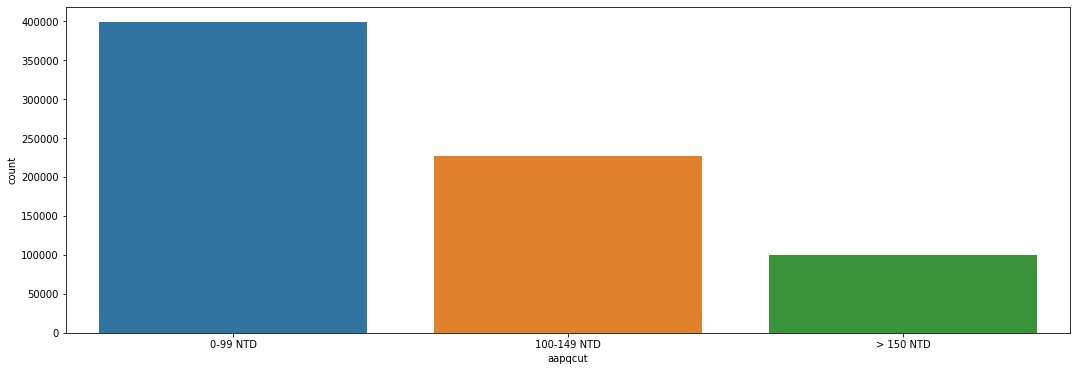

In [79]:
df['aapqcut'] = pd.qcut(x= df["actual_amount_paid"], q = 4,duplicates = 'drop', labels = 
                        ['100-149 NTD','0-99 NTD', '> 150 NTD'])
df['aapqcut'] = df.aapqcut.values.astype(str)
plt.figure(figsize=(18,6))
sns.countplot(x= 'aapqcut', data = df)


C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/2310481039.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aapqcut = df.groupby('aapqcut').sum()['is_churn'] /totusers *100


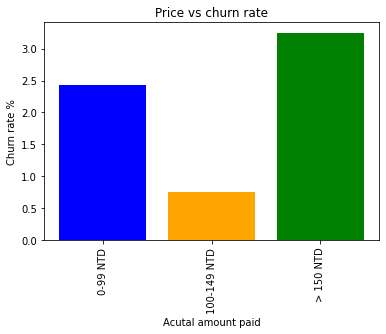

In [98]:
aapqcut = df.groupby('aapqcut').sum()['is_churn'] /totusers *100
plt.bar(aapqcut.index, aapqcut.values, color = ['blue','orange','green'])
plt.title('Price vs churn rate')
plt.xlabel('Acutal amount paid')
plt.ylabel('Churn rate %')
plt.xticks(rotation= 'vertical')
plt.show()

C:\Users\marsh\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


<AxesSubplot: xlabel='plpqcut', ylabel='count'>

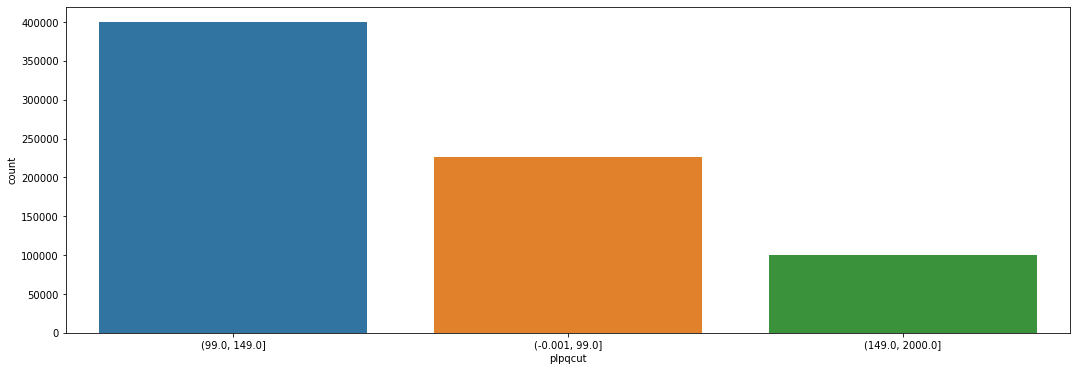

In [55]:
df['plpqcut'] = pd.qcut(x= df["plan_list_price"], q = 4,duplicates = 'drop')
df['plpqcut'] = df['plpqcut'].astype(str)
plt.figure(figsize=(18,6))
sns.countplot(x = 'plpqcut', data = df)



C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/3247912439.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plpqcut = df.groupby('plpqcut').sum()['is_churn'] /totusers *100


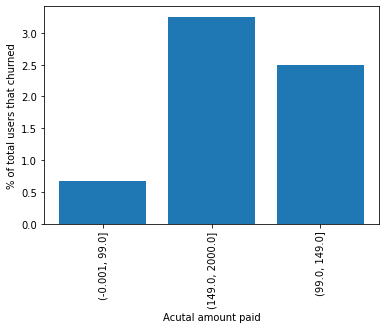

In [56]:
plpqcut = df.groupby('plpqcut').sum()['is_churn'] /totusers *100
plt.bar(plpqcut.index, plpqcut.values)
plt.xlabel('Acutal amount paid')
plt.ylabel('% of total users that churned')
plt.xticks(rotation= 'vertical')
plt.show()

# identical to actual amount paid, so we will use actual amount paid for our model.

C:\Users\marsh\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


[Text(0.5, 0, 'Payment plan days'), Text(0, 0.5, 'count')]

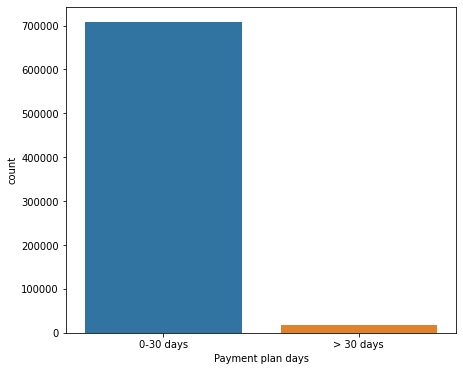

In [95]:
df['ppdqcut'] = pd.qcut(x= df["payment_plan_days"], q = 4,duplicates = 'drop', labels = ['0-30 days', '> 30 days'])
df['ppdqcut'] = df.ppdqcut.astype(str)
plt.figure(figsize=(7,6))
plt.xlabel('payment plan days')
ax = sns.countplot(x = 'ppdqcut', data = df)
ax.set(xlabel = 'Payment plan days', ylabel = 'count')

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/2827256647.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ppd = df.groupby('ppdqcut').sum()['is_churn'] /totusers *100


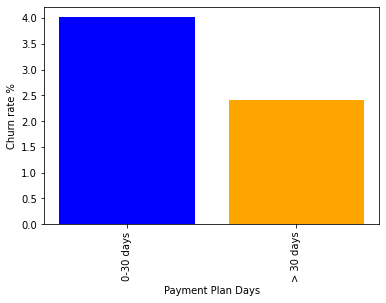

In [103]:

ppd = df.groupby('ppdqcut').sum()['is_churn'] /totusers *100
plt.bar(ppd.index, ppd.values, color = ['blue','orange'])
plt.xlabel('Payment Plan Days')
plt.ylabel('Churn rate %')
plt.xticks(rotation= 'vertical')
plt.show()

C:\Users\marsh\AppData\Local\Temp/ipykernel_16308/4275972774.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city = df.groupby('city').sum()['is_churn'] / totusers * 100


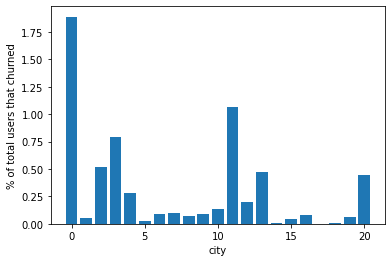

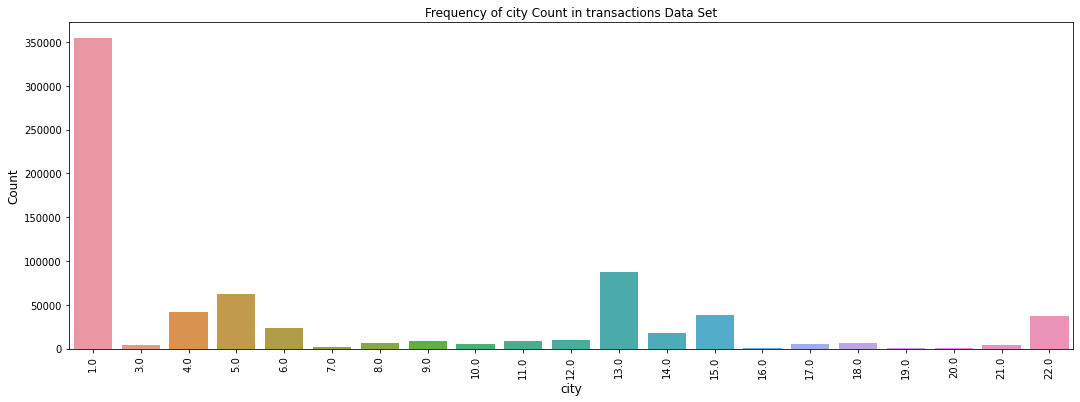

In [59]:
city = df.groupby('city').sum()['is_churn'] / totusers * 100
plt.bar(np.arange(len(list(city.index))), list(city))
plt.xlabel('city')
plt.ylabel('% of total users that churned')
plt.show()

plt.figure(figsize=(18,6))
sns.countplot(x="city", data=df)
plt.ylabel('Count', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of city Count in transactions Data Set", fontsize=12)
plt.show()

In [60]:
df

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,latest_transaction,latest_membership_expiration,is_cancel,avg_membership_duration,avg_time_between_transactions,latest_listen_date,num_unq,total_secs,percent_25,percent_50,percent_100,city,registered_via,registration_init_time,amdqcut,year,aapqcut,plpqcut,ppdqcut
0,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-19,0.0,49.5,15.5,2017-03-31,43.0,115411.260,0.075838,0.021164,0.876543,15.0,9.0,2010-11-18,"(31.0, 2118.796]",2010,"(99.0, 149.0]","(99.0, 149.0]","(0.999, 30.0]"
1,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-23,0.0,53.5,15.5,2017-03-30,52.0,36636.638,0.317597,0.077253,0.562232,22.0,9.0,2012-01-22,"(31.0, 2118.796]",2012,"(99.0, 149.0]","(99.0, 149.0]","(0.999, 30.0]"
2,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,0,14.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-04,0.0,34.5,15.5,2017-03-25,25.0,10243.065,0.090909,0.072727,0.763636,13.0,3.0,2014-04-21,"(31.0, 2118.796]",2014,"(99.0, 149.0]","(99.0, 149.0]","(0.999, 30.0]"
3,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-21,0.0,51.5,15.5,2017-03-28,80.0,292650.977,0.157303,0.024345,0.808989,13.0,9.0,2006-02-18,"(31.0, 2118.796]",2006,"(99.0, 149.0]","(99.0, 149.0]","(0.999, 30.0]"
4,++6P09mCSJSh+Ft2pvZ0FWTrtcI3v1A7h3/coh8dBKw=,0,39.0,30.0,149.0,149.0,1.0,2017-03-31,2017-05-13,0.0,43.5,15.5,2017-03-25,7.0,2994.947,0.000000,0.142857,0.857143,22.0,9.0,2010-09-21,"(31.0, 2118.796]",2010,"(99.0, 149.0]","(99.0, 149.0]","(0.999, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725717,zzx1qgX8R9EmT8PAn4/KyQ6s7PuLYTfR8kUCABiCW9E=,0,41.0,30.0,99.0,99.0,1.0,2017-03-31,2017-04-30,0.0,30.0,0.0,2017-03-24,38.0,27727.142,0.057554,0.007194,0.913669,6.0,9.0,2014-10-14,"(-0.001, 30.0]",2014,"(-0.001, 99.0]","(-0.001, 99.0]","(0.999, 30.0]"
725718,zzx4hKiyR9XFEGAr7SAjcCPbKJCZ+IqegWL7dPjPwZk=,0,41.0,30.0,99.0,99.0,1.0,2017-03-18,2017-04-19,0.0,32.0,0.0,2017-03-26,45.0,51394.898,0.095238,0.035714,0.861111,1.0,7.0,2011-08-23,"(31.0, 2118.796]",2011,"(-0.001, 99.0]","(-0.001, 99.0]","(0.999, 30.0]"
725719,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,0,41.0,30.0,99.0,99.0,1.0,2017-03-26,2017-04-26,0.0,31.0,0.0,2017-03-10,40.0,13172.171,0.033333,0.000000,0.966667,4.0,7.0,2012-03-06,"(30.0, 31.0]",2012,"(-0.001, 99.0]","(-0.001, 99.0]","(0.999, 30.0]"
725720,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,1,36.0,30.0,180.0,180.0,0.0,2017-02-28,2017-04-01,0.0,32.0,0.0,2017-03-31,56.0,268039.763,0.094642,0.048017,0.825331,5.0,3.0,2015-04-30,"(31.0, 2118.796]",2015,"(149.0, 2000.0]","(149.0, 2000.0]","(0.999, 30.0]"


In [62]:
cat = df.drop(columns = ['plan_list_price','total_secs','percent_25','percent_50','percent_100'])
cat = cat.rename(columns = {'year': 'reg_year'})
from dython.nominal import associations

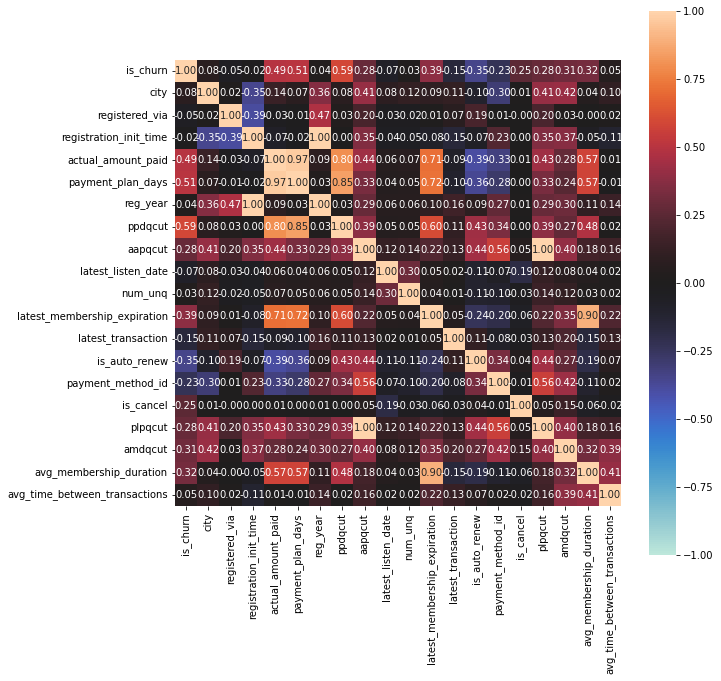

{'corr':                                is_churn      city  registered_via  \
 is_churn                       1.000000  0.076710       -0.049382   
 city                           0.076710  1.000000        0.021509   
 registered_via                -0.049382  0.021509        1.000000   
 registration_init_time        -0.015307 -0.351923       -0.387392   
 actual_amount_paid             0.492414  0.139258       -0.030877   
 payment_plan_days              0.506000  0.072255       -0.013275   
 reg_year                       0.035854  0.361441        0.472898   
 ppdqcut                        0.587751  0.076579        0.032907   
 aapqcut                        0.281922  0.409516        0.195021   
 latest_listen_date            -0.074357  0.083714       -0.025085   
 num_unq                        0.027861  0.116840       -0.024191   
 latest_membership_expiration   0.386163  0.094390        0.009988   
 latest_transaction            -0.154172  0.109484        0.065246   
 is_auto_ren

In [75]:
associations(cat[['is_churn','city','registered_via','registration_init_time','actual_amount_paid',
                  'payment_plan_days',
                  'reg_year','ppdqcut','aapqcut','latest_listen_date','num_unq','latest_membership_expiration',
                  'latest_transaction','is_auto_renew','payment_method_id','is_cancel','plpqcut',
                  'amdqcut','avg_membership_duration','avg_time_between_transactions']], nom_nom_assoc = 'cramer', figsize = (10,10))